# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating

In [3]:
df = pd.read_csv("data/reviews_sentiment.csv",sep=";")

<AxesSubplot: xlabel='sentimentValue', ylabel='wordcount'>

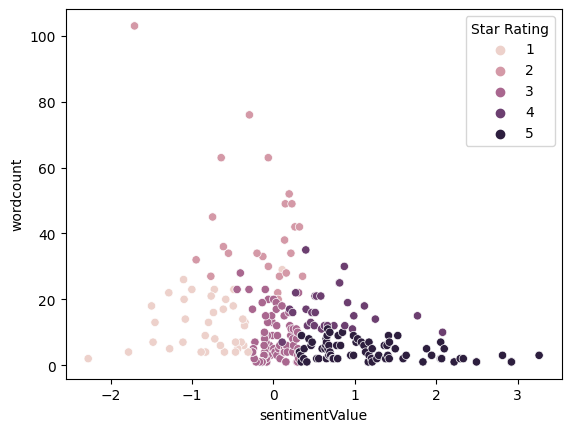

In [4]:
sns.scatterplot(data=df,x='sentimentValue',y='wordcount',hue='Star Rating')

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [5]:
from sklearn.model_selection import train_test_split

X = df[['wordcount','sentimentValue']]
y = df[['Star Rating']]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.815,random_state=2022)

In [6]:
X_train.head()

,wordcount,sentimentValue
189,4,0.694613
36,32,-0.950121
145,17,0.400986
38,22,0.052841
188,10,0.693039


In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_m = KNeighborsClassifier()

knn_m.fit(X_train_sc, y_train)

/home/carlos/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
# Rendimiento del modelo en los datos de train
y_pred_train = knn_m.predict(X_train_sc)
accuracy_score(y_true=y_train, y_pred=y_pred_train)

0.9090909090909091

In [11]:
# Rendimiento del modelo en los datos de test
y_pred = knn_m.predict(X_test_sc)
accuracy_score(y_true=y_test,y_pred=y_pred)

0.8541666666666666

## Resultados obtenidos

## ¿Cómo obtener el mejor valor de k?
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

## Predicciones
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [16]:
new_fila = np.array([5,1]) # 5 palabras, 1 sentimiento

new_fila_sc = sc.transform(new_fila.reshape(1,-1))

/home/carlos/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [17]:
knn_m.predict(new_fila_sc)

array([5])

In [19]:
knn_m.predict(new_fila.reshape(1,-1))

array([2])